<a href="https://colab.research.google.com/github/jashanpreetjabbal/cap-comp215/blob/main/LangtonAnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Life in Ant Land: Langton's Ant Explored Through the Lens of Cellular Automata
#### by Jashanpreet Singh
#### submitted to Joseph Fall

#### To Do:
#### objectives:
     to develop another 2D CA similar to Game of Life
     to experiment with interactions between persistent patterns

#### Background:
Langton's ant is a 2D CA with simple rules but complex emergent behaviour, invented by Chris Langton in 1986. The universality of Langton's ant was proven in 2000. The idea has been generalized in several different ways, such as turmites which add more colors and more states. https://en.wikipedia.org/wiki/Langton's_ant

    In this project, we will develop a simulation of Langton’s Ant and experiment to learn some of its behaviours.


The project gets its ideas from Lab6 and codes been modified using help of AI and existing models from various individuals(will be mentioned accordingly).

Lets import the required libraries first.

In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

%matplotlib inline
matplotlib.rc('animation', html='jshtml')

The code below is taken from Lab6 as it serves my purpose.

In [2]:


def plot_2d_array(array, axes=None, title='', cmap='Blues', **options):

    axes = axes or plt.gca()
    axes.set_title(title)

    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False ,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,)

    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

Langton's Ant rules:

1. The ant moves on a grid where each cell can be black or white.
2. It starts on a cell facing a direction (up, down, left, or right).
3. At each step:
   - If the ant is on a white cell, it turns right, flips the cell to black, and moves forward.
   - If the ant is on a black cell, it turns left, flips the cell to white, and moves forward.
4. The ant repeats these steps indefinitely.

The code below is inspired from lesguillemets(github) project on langton' Ant.

https://github.com/lesguillemets/Langtons_ant

i loved the way he used vectors to determine direction

In [3]:
class Ant(object):
    def __init__(self, location, direction):
        self.location = location
        self.direction = direction

        self.isalive = True
        self.v = {
            0: (0, 1),
            1: (1, 0),
            2: (0, -1),
            3: (-1, 0),
        }

    def turn(self, degs):
        self.direction += degs
        self.direction = self.direction % 4

    def turn_right(self):
        self.turn(1)

    def turn_left(self):
        self.turn(3)

    def move(self):
        self.location = list(map(sum, zip(self.location, self.v[self.direction])))

    def die(self):
        self.isalive = False

The code below has been taken from Lab6 and modified for the appropriate usage as needed for the project. The shape of the ant(last function) was generated by  AI.

In [4]:
class LangtonsAnt:
    def __init__(self, size=101, start=(5, 5), num_ants=1):
        self.size = size
        self.grid = np.zeros((size, size), dtype=np.uint8)
        self.ants = [Ant(start, np.random.randint(0, 4)) for _ in range(num_ants)]
        self.rotation_matrix = np.array([[0, 1], [-1, 0]])

    def step(self):
        for ant in self.ants:
            x, y = ant.location
            if self.grid[x, y] == 0:
                ant.turn_right()
                self.grid[x, y] = 1
            else:
                ant.turn_left()
                self.grid[x, y] = 0
            ant.move()
            ant.location = np.mod(ant.location, self.size)

    def draw(self, axes=None, step=''):
        axes = axes or plt.gca()
        plot_2d_array(self.grid, axes, title=f"Langton's Ant {step}", cmap='binary')
        for ant in self.ants:
            x, y = ant.location
            direction = ant.direction
            dx, dy = ant.v[direction]
            vertices = np.array([[x - 0.3 * dy, y + 0.3 * dx],
                                 [x + 0.3 * dy - 0.2 * dx, y - 0.3 * dx - 0.2 * dy],
                                 [x + 0.3 * dy + 0.2 * dx, y - 0.3 * dx + 0.2 * dy]])
            axes.fill(vertices[:, 0], vertices[:, 1], 'red')

The class below is from Lab6 as it was just perfect to be used for the animation.

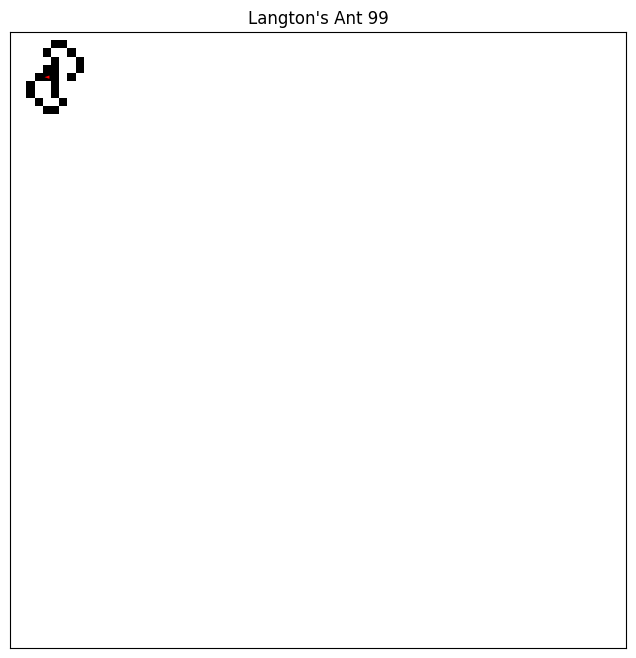

In [5]:
class Animation2D:
    """
    Animates any 2D model with a step() method and a draw() method, using matplotlib
    model.step() should take no parameters - just step the model forward one step.
    model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number
    """

    def __init__(self, model, frames=50, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            self.model.step()
        self.model.draw(self.ax, step=step)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

# Create Langton's Ant instance
size = 75
ant = LangtonsAnt(size, start=(5, 5))

langton_ant_animation = Animation2D(ant, frames=100)

langton_ant_animation.animate()


The below code is another example when we will start the with the position of ant from center.

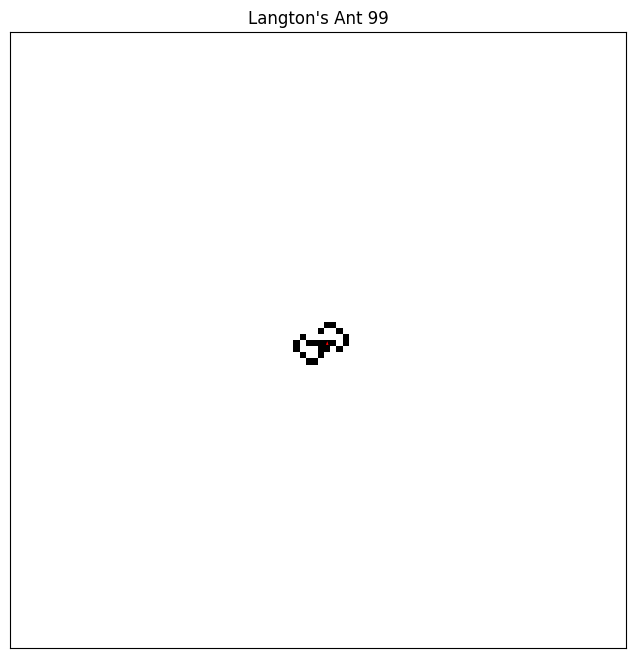

In [31]:
ant_center = LangtonsAnt(size, start=(size // 2, size // 2))
animation_center = Animation2D(ant_center, frames=100)
animation_center.animate()


This examples implements when the ant is on top-left.


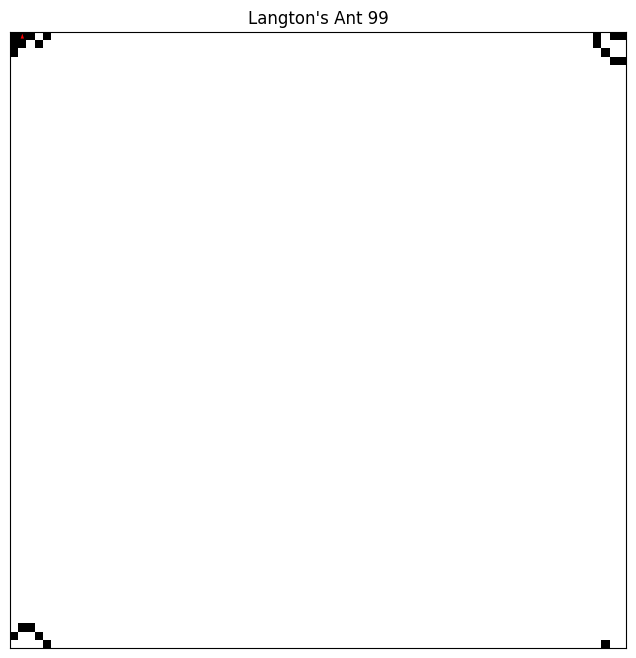

In [42]:
ant_top_left = LangtonsAnt(size, start=(0, 0))
animation_top_left = Animation2D(ant_top_left, frames=100)
animation_top_left.animate()


This example is for the new position of ant which is bottom right.

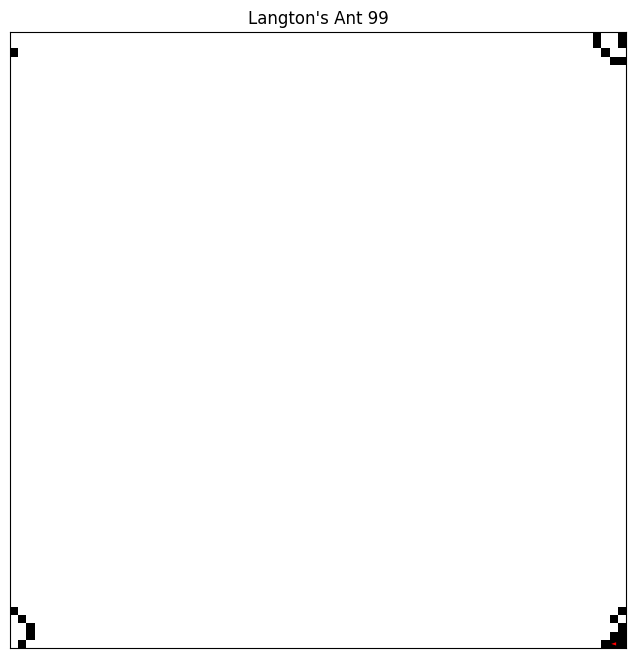

In [16]:
ant_bottom_right = LangtonsAnt(size, start=(size - 1, size - 1))
animation_bottom_right = Animation2D(ant_bottom_right, frames=100)
animation_bottom_right.animate()


The examples provided runs for 5000 steps which tells how the ant will behave when it starts from center of the grid and what complex structures can arise form this position(It took me 30 minutes to run this).

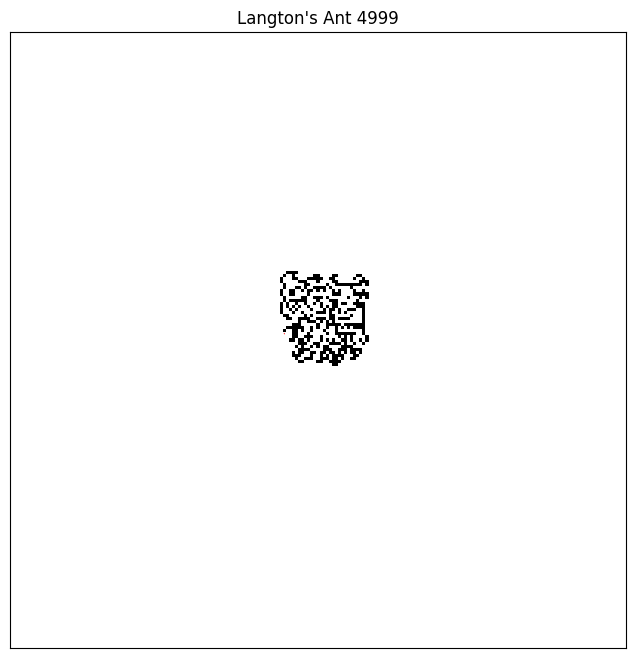

In [39]:
size = 201  # Grid size
steps = 5000  # Number of steps to run the simulation

ant_center = LangtonsAnt(size, start=(size // 2, size // 2))
animation_center = Animation2D(ant_center, frames=steps)
animation_center.animate()


we have tried with different positions but what if we change the number of ants ? the answer is in next simulation.

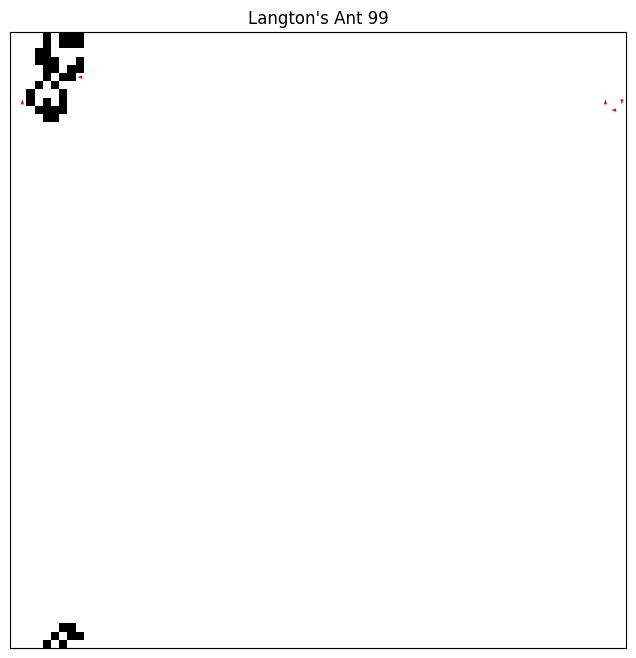

In [17]:
ant = LangtonsAnt(size, start=(5, 5), num_ants=5)
langton_ant_animation = Animation2D(ant, frames=100)
langton_ant_animation.animate()



---



---


# **Algorithm Analysis**
**Ques1:** What is the Big-O time complexity of the algorithm we are using here to simulate this system?
What implications does that have for running larger or longer CA experiments ?

**Ans1**: The algo's time complexity is O(N*M);N: num of simulations; M: num of ants. however when the number of ant is just one then the time complexity is just O(N) which tells that if we run larger experiments with larger grid size the time will increase linearly. But adding more ants which we did in the last example, it makes the time complexity O( N * M ) which will take much time.



**Ques2:** Use Python’s timeit to do some actual timings to support your algorithm analysis.

**Ans2**: the implementation was done by AI.

In [ ]:
def calc_time(n):
    time = dict()
    for i in range(n):
        test_ant = Ant([100,100], 0)  # Passing a dummy direction argument
        test_world = LangtonsAnt(200, (test_ant,))
        time_taken = timeit.timeit(lambda: test_world.step(), number=100)
        time[i] = time_taken
    plt.plot(time.keys(), time.values())
    plt.xlabel('Iteration')
    plt.ylabel('Time (s)')
    plt.title('Time taken for Langton\'s Ant simulation')
    plt.show()

# Run the time calculation function
calc_time(100)

**Ques3:**Early in the Chapter 8 notebook, the author makes some efficiency improvements to the basic algorithm.
Do these improvements change the Big-O time complexity?
Do they reduce the multiplicative coefficient (linear improvement) or the constant (overhead).

**Ans3:**

---
---
**Next thing which i would like to add:** I have seen many Langton's Ant
projects and many of them use Pygame to get output or make it look interesting. i would try to add pygame and simulate to do that.